## DATA PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [2]:
#loading csv file using pandas
df=pd.read_csv(r"C:\Users\sachi\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv")

In [3]:
df.isnull().sum()#null value checking 
# no null values

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [5]:
#Lets see object column
object_data = [] #to store the object columns

for i in df.columns:
    if df[i].dtype=="O":
      object_data.append(i)
      print(i,df[i].unique())
      print("\t")

EmpNumber ['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
	
Gender ['Male' 'Female']
	
EducationBackground ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
	
MaritalStatus ['Single' 'Married' 'Divorced']
	
EmpDepartment ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
	
EmpJobRole ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
	
BusinessTravelFrequency ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
	
OverTime ['No' 'Yes']
	
Attrition ['No' 'Yes']
	


**CONVERSION OF CATEGORICAL DATA TO NUMERICAL**

In [6]:
#Encoding Target column
encode = {
    2 : 0, 3 : 1, 4 : 2
}
df['PerformanceRating'] = df['PerformanceRating'].map(encode
                               )


In [7]:
#manually encoding overtime,business travel frequency and Attrition
df.OverTime =df.OverTime.map({'Yes':1,'No':0})
df.BusinessTravelFrequency=df.BusinessTravelFrequency.map({'Travel_Frequently':2,'Travel_Rarely':1,'Non-Travel':0})
df.Attrition=df.Attrition.map({'Yes':1,'No':0})

In [8]:
#label encoding for EducationBackground,EmpJobRole,EmpDepartment and MaritalStatus
ta  = LabelEncoder().fit(df["EducationBackground"])
si  = LabelEncoder().fit(df["EmpJobRole"])
ms = LabelEncoder().fit(df["EmpDepartment"])
sd = LabelEncoder().fit(df["MaritalStatus"])

In [9]:
df["EducationBackground"] = ta.fit_transform(df["EducationBackground"])
df["EmpJobRole"] = ta.fit_transform(df["EmpJobRole"])
df["EmpDepartment"] = si.fit_transform(df["EmpDepartment"])
df["MaritalStatus"] = ta.fit_transform(df["MaritalStatus"])

In [10]:
#dummy ending of Gender column
df.Gender=pd.get_dummies(df.Gender,drop_first=True)

In [11]:
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,1,10,3,...,4,10,2,2,10,7,0,8,0,1
1,E1001006,47,1,2,2,5,13,1,14,4,...,4,20,2,3,7,7,1,7,0,1
2,E1001007,40,1,1,1,5,13,2,5,4,...,3,20,2,3,18,13,1,12,0,2
3,E1001009,41,1,0,0,3,8,1,10,4,...,2,23,2,2,21,6,12,6,0,1
4,E1001010,60,1,2,2,5,13,1,16,4,...,4,10,1,3,2,2,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,0,3,0,5,13,2,3,1,...,2,6,3,3,6,5,0,4,0,2
1196,E100993,37,1,1,2,1,15,1,10,2,...,1,4,2,3,1,0,0,0,0,1
1197,E100994,50,1,3,1,1,15,1,28,1,...,3,20,3,3,20,8,3,8,0,1
1198,E100995,34,0,3,2,0,1,1,9,3,...,2,9,3,4,8,7,7,7,0,1


**CHECKING FOR OUTLIERS**

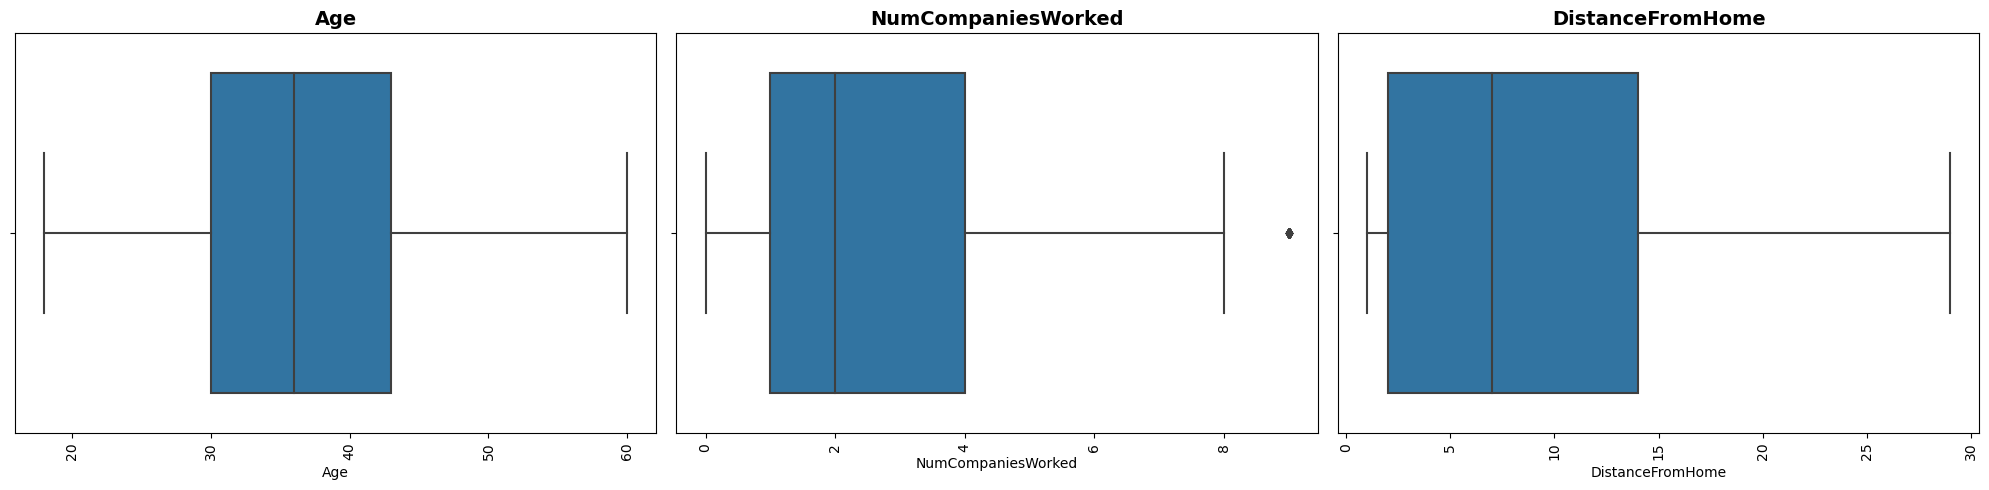

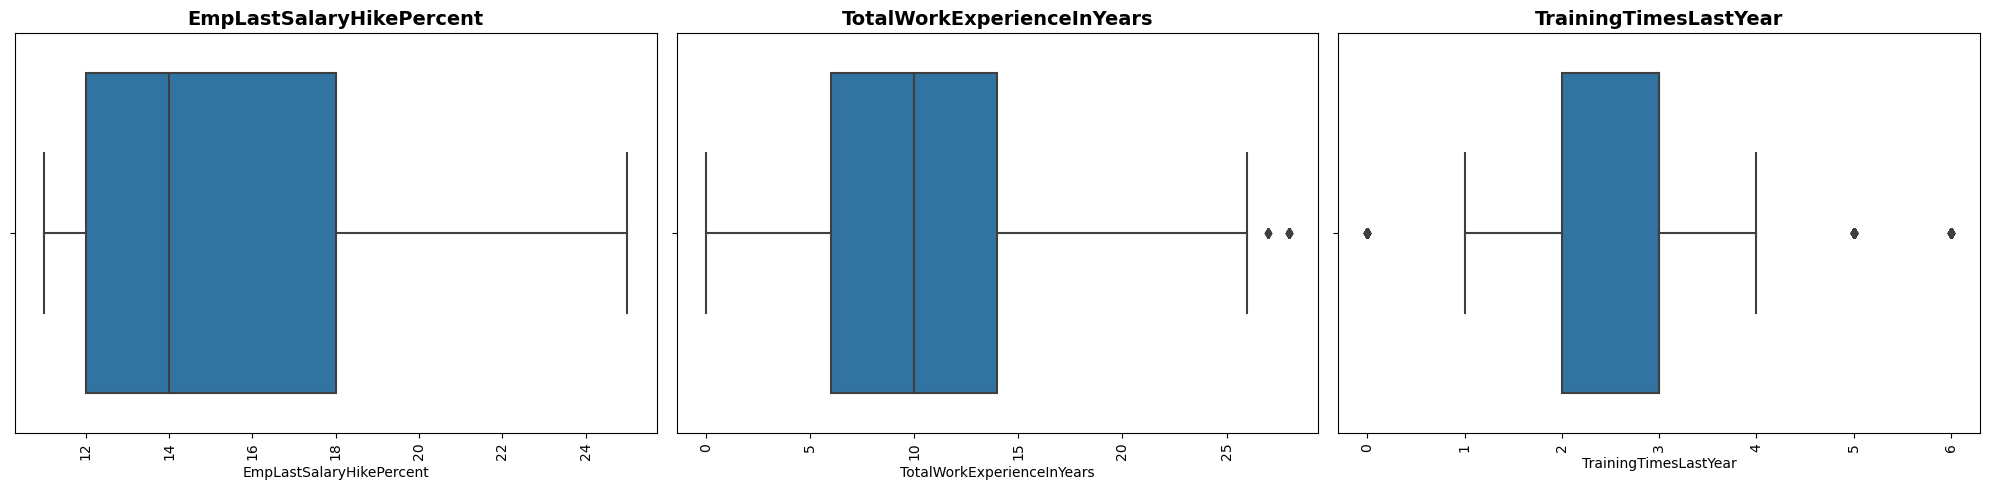

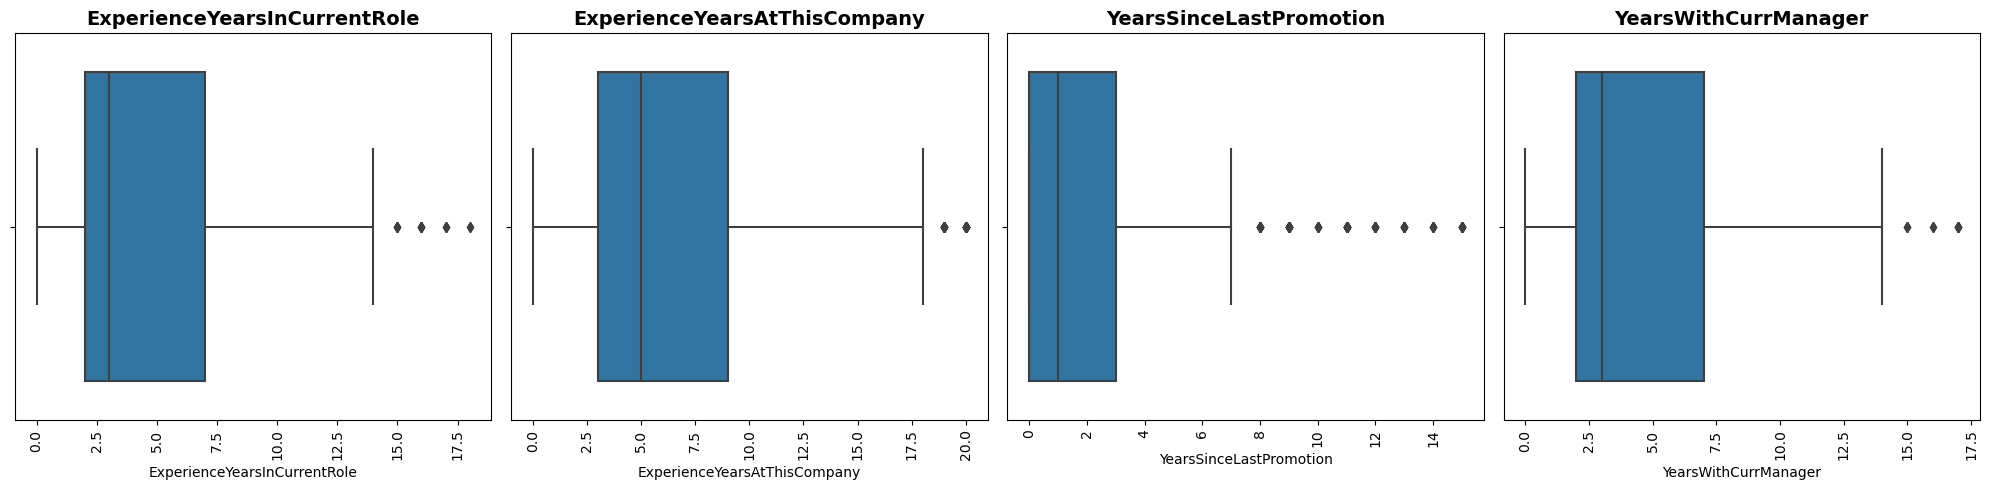

In [60]:
plt.figure(figsize=(20,5))
countplt = plt.subplot(1, 3, 1)
plt.title('Age', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.boxplot(df["Age"])
plt.tight_layout()
plt.xticks(rotation=90)
 
countplt = plt.subplot(1, 3, 2)
plt.title('NumCompaniesWorked', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.boxplot(df["NumCompaniesWorked"])
plt.xticks(rotation=90)
plt.tight_layout()
countplt = plt.subplot(1, 3, 3)
plt.title('DistanceFromHome', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.boxplot(df["DistanceFromHome"])
plt.tight_layout()
plt.xticks(rotation=90)
plt.figure(figsize=(20,5))
countplt = plt.subplot(1, 3, 1)
plt.title('EmpLastSalaryHikePercent', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.boxplot(df["EmpLastSalaryHikePercent"])
plt.xticks(rotation=90)
plt.tight_layout()

plt.tight_layout()
plt.xticks(rotation=90)
 
countplt = plt.subplot(1, 3, 2)
plt.title('TotalWorkExperienceInYears', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.boxplot(df["TotalWorkExperienceInYears"])
plt.xticks(rotation=90)
plt.tight_layout()

countplt = plt.subplot(1, 3, 3)
plt.title('TrainingTimesLastYear', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.boxplot(df["TrainingTimesLastYear"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.figure(figsize=(20,5))
countplt = plt.subplot(1, 4, 1)
plt.title('ExperienceYearsInCurrentRole', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.boxplot(df["ExperienceYearsInCurrentRole"])
plt.tight_layout()
plt.xticks(rotation=90)
 
countplt = plt.subplot(1, 4, 2)
plt.title('ExperienceYearsAtThisCompany', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.boxplot(df["ExperienceYearsAtThisCompany"])
plt.xticks(rotation=90)
plt.tight_layout()

countplt = plt.subplot(1, 4, 3)
plt.title('YearsSinceLastPromotion', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.boxplot(df["YearsSinceLastPromotion"])
plt.xticks(rotation=90)
plt.tight_layout()
countplt = plt.subplot(1, 4, 4)
plt.title('YearsWithCurrManager', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.boxplot(df["YearsWithCurrManager"])
plt.xticks(rotation=90)
plt.tight_layout()

* There are outliers present in our data,so lets handle it and make the data normal

**TotalWorkExperienceInYears**

In [11]:
#lets take a look into the outlier data using IQR

IQR = stats.iqr(df.TotalWorkExperienceInYears, interpolation='midpoint')
print(IQR)
Q1 = df.TotalWorkExperienceInYears.quantile(0.25)
 
Q3 =df.TotalWorkExperienceInYears.quantile(0.75)

max_limit=Q3 +1.5*IQR
min_limit=Q1 - 1.5*IQR
print(min_limit)
print(max_limit)
print(df.TotalWorkExperienceInYears.median())

9.0
-7.5
28.5
10.0


In [12]:
df.loc[df['TotalWorkExperienceInYears'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
17,E1001040,56,1,3,1,1,3,1,9,3,...,3,30,1,2,10,7,1,1,0,1
25,E1001054,52,1,2,1,5,8,1,3,4,...,1,34,3,4,34,6,1,16,0,2
48,E1001093,50,1,3,1,1,3,1,2,3,...,4,30,3,3,4,3,0,3,0,1
72,E1001129,51,0,2,1,5,8,1,26,4,...,3,29,2,2,20,6,4,17,0,1
77,E1001140,53,0,2,1,5,13,1,7,2,...,4,35,3,3,5,2,0,4,0,1
96,E1001179,53,0,1,2,1,3,1,23,4,...,3,33,0,3,12,9,3,8,0,1
100,E1001183,50,1,1,0,1,3,0,2,4,...,4,31,3,3,31,6,14,7,0,1
149,E1001275,50,1,3,0,1,15,1,1,2,...,3,32,1,2,5,4,1,3,0,2
173,E1001310,59,0,1,2,4,10,1,2,3,...,1,30,4,3,5,3,4,3,0,1
178,E1001316,52,0,2,1,5,8,1,2,1,...,4,33,3,3,32,14,6,9,1,0


In [13]:
#The outlier is less than 5% so lets deal with it
#lets use median to handle the outlier
#total outlier datapoints are below 5%,so lets handle this by imputing 
df.TotalWorkExperienceInYears.loc[df.TotalWorkExperienceInYears > max_limit]=10

**ExperienceYearsAtThisCompany**

In [14]:
IQR = stats.iqr(df.ExperienceYearsAtThisCompany, interpolation='midpoint')
print(IQR)
Q1 = df.ExperienceYearsAtThisCompany.quantile(0.25)
 
Q3 =df.ExperienceYearsAtThisCompany.quantile(0.75)

max_limit=Q3 +1.5*IQR
min_limit=Q1 - 1.5*IQR
print(min_limit)
print(max_limit)
print(df.ExperienceYearsAtThisCompany.median())

7.0
-7.5
20.5
5.0


In [15]:
df.loc[df['ExperienceYearsAtThisCompany'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
3,E1001009,41,1,0,0,3,8,1,10,4,...,2,23,2,2,21,6,12,6,0,1
11,E1001024,47,0,3,0,5,13,2,3,3,...,4,28,2,2,22,2,11,13,0,1
25,E1001054,52,1,2,1,5,8,1,3,4,...,1,10,3,4,34,6,1,16,0,2
52,E1001098,47,0,4,1,1,3,1,2,2,...,3,26,3,2,26,14,3,0,0,1
100,E1001183,50,1,1,0,1,3,0,2,4,...,4,10,3,3,31,6,14,7,0,1
168,E1001304,39,0,1,1,4,10,1,1,1,...,3,21,3,3,21,6,11,8,0,1
175,E1001313,41,0,1,0,4,11,0,7,1,...,2,21,3,3,21,16,5,10,0,0
178,E1001316,52,0,2,1,5,8,1,2,1,...,4,10,3,3,32,14,6,9,1,0
181,E1001321,39,0,3,2,4,10,2,22,3,...,3,21,2,3,21,6,2,8,0,1
216,E1001387,42,1,3,1,4,8,1,2,2,...,4,23,3,3,22,6,13,7,0,1


In [16]:
#The outlier is less than 5% so lets deal with it
#lets use median to handle the outlier
#total outlier datapoints are below 5%,so lets handle this by imputing 
df.ExperienceYearsAtThisCompany.loc[df.ExperienceYearsAtThisCompany > max_limit]=5

**YearsSinceLastPromotion**

In [12]:
IQR = stats.iqr(df.YearsSinceLastPromotion, interpolation='midpoint')
print(IQR)
Q1 = df.YearsSinceLastPromotion.quantile(0.25)
 
Q3 =df.YearsSinceLastPromotion.quantile(0.75)

max_limit1=Q3 +1.5*IQR
min_limit1=Q1 - 1.5*IQR
print(min_limit1)
print(max_limit1)

3.0
-4.5
7.5


In [14]:
df.loc[df['YearsSinceLastPromotion'] > max_limit1]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
3,E1001009,41,1,0,0,3,8,1,10,4,...,2,23,2,2,21,6,12,6,0,1
11,E1001024,47,0,3,0,5,13,2,3,3,...,4,28,2,2,22,2,11,13,0,1
100,E1001183,50,1,1,0,1,3,0,2,4,...,4,31,3,3,31,6,14,7,0,1
130,E1001239,31,0,3,1,1,3,1,12,3,...,3,10,2,1,9,7,8,5,0,1
132,E1001248,37,1,1,1,5,13,1,1,4,...,3,17,2,1,14,1,11,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,E100903,41,0,1,1,5,8,1,2,5,...,2,22,2,3,18,16,11,8,0,0
1160,E100922,50,1,3,1,3,8,2,3,3,...,3,32,2,3,32,5,10,7,0,0
1181,E100961,34,1,1,1,1,15,1,1,5,...,4,10,4,2,10,9,8,8,0,1
1185,E100969,35,1,1,2,1,15,1,6,4,...,2,17,3,3,17,11,11,8,0,1


* The outliers in YearsSinceLastPromotion is more than 5% so we are not handling this

**Years Exoereience in the current role**

In [19]:
IQR3 = stats.iqr(df.ExperienceYearsInCurrentRole, interpolation='midpoint')
print(IQR3)
Q1 = df.ExperienceYearsInCurrentRole.quantile(0.25)
 
Q3 =df.ExperienceYearsInCurrentRole.quantile(0.75)

max_limit2=Q3 +1.5*IQR
min_limit2=Q1 - 1.5*IQR
print(min_limit2)
print(max_limit2)
print(df.ExperienceYearsInCurrentRole.median())

5.0
-2.5
11.5
3.0


In [20]:
df.loc[df['ExperienceYearsInCurrentRole'] > max_limit2]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
2,E1001007,40,1,1,1,5,13,2,5,4,...,3,20,2,3,18,13,1,12,0,2
52,E1001098,47,0,4,1,1,3,1,2,2,...,3,26,3,2,5,14,3,0,0,1
76,E1001135,36,1,1,1,5,13,1,1,2,...,4,18,1,2,18,14,4,11,0,1
123,E1001228,38,0,5,1,1,15,1,1,3,...,2,15,3,3,15,12,5,11,0,1
126,E1001235,41,1,3,2,1,3,1,6,3,...,3,20,3,3,18,13,2,17,0,1
137,E1001259,53,1,3,0,5,8,1,2,2,...,3,22,3,4,17,13,15,2,0,1
151,E1001277,41,1,3,0,1,3,2,9,3,...,2,21,2,4,18,16,0,11,0,1
175,E1001313,41,0,1,0,4,11,0,7,1,...,2,21,3,3,5,16,5,10,0,0
178,E1001316,52,0,2,1,5,8,1,2,1,...,4,10,3,3,5,14,6,9,1,0
203,E1001358,46,0,1,0,4,16,1,8,4,...,1,19,2,3,16,13,1,7,0,2


In [21]:
#lets use Quantile based flooring and capping
# In this technique, the outlier is capped at a certain value above the 90th percentile value .
print("90th quantile : ", np.quantile(df.ExperienceYearsInCurrentRole, .90))

90th quantile :  9.0


In [22]:

df.ExperienceYearsInCurrentRole.loc[df.ExperienceYearsInCurrentRole > max_limit]=9

**Years with current manager**

In [23]:
IQR3 = stats.iqr(df.YearsWithCurrManager, interpolation='midpoint')
print(IQR3)
Q1 = df.YearsWithCurrManager.quantile(0.25)
 
Q3 =df.YearsWithCurrManager.quantile(0.75)

max_limit3=Q3 +1.5*IQR
min_limit3=Q1 - 1.5*IQR
print(min_limit3)
print(max_limit3)
print(df.YearsWithCurrManager.median())

5.0
-2.5
11.5
3.0


In [24]:
df[df['YearsWithCurrManager'] > max_limit3].shape

(37, 28)

In [25]:
#lets use Quantile based flooring and capping
# In this technique, the outlier is capped at a certain value above the 90th percentile value .
print("90th quantile : ", np.quantile(df.YearsWithCurrManager, .90))

90th quantile :  9.0


In [26]:

df.YearsWithCurrManager.loc[df.YearsWithCurrManager > max_limit]=9

In [27]:
#Rest of the columns have very less outliers and columns are not using for model creation

In [28]:
#lets check for duplicate rows
df.duplicated().sum()

0

In [29]:
df.describe()#check for std =0 

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.00000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,0.604167,2.23500,1.096667,3.215000,9.039167,1.07500,9.165833,2.89250,2.715833,...,2.725000,10.372500,2.785833,2.744167,6.100000,4.291667,2.194167,4.105000,0.148333,0.948333
std,9.087289,0.489233,1.31004,0.731050,1.696911,4.754451,0.53816,8.176636,1.04412,1.090599,...,1.075642,6.366385,1.263446,0.699374,4.493532,3.613744,3.221560,3.541576,0.355578,0.518866
min,18.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,1.000000,1.00000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.00000,1.000000,1.000000,4.000000,1.00000,2.000000,2.00000,2.000000,...,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000
50%,36.000000,1.000000,2.00000,1.000000,4.000000,9.000000,1.00000,7.000000,3.00000,3.000000,...,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,1.000000
75%,43.000000,1.000000,3.00000,2.000000,5.000000,13.000000,1.00000,14.000000,4.00000,4.000000,...,4.000000,14.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000,1.000000
max,60.000000,1.000000,5.00000,2.000000,5.000000,18.000000,2.00000,29.000000,5.00000,4.000000,...,4.000000,28.000000,6.000000,4.000000,20.000000,18.000000,15.000000,17.000000,1.000000,2.000000


### FEATURE SELECTION

<AxesSubplot:>

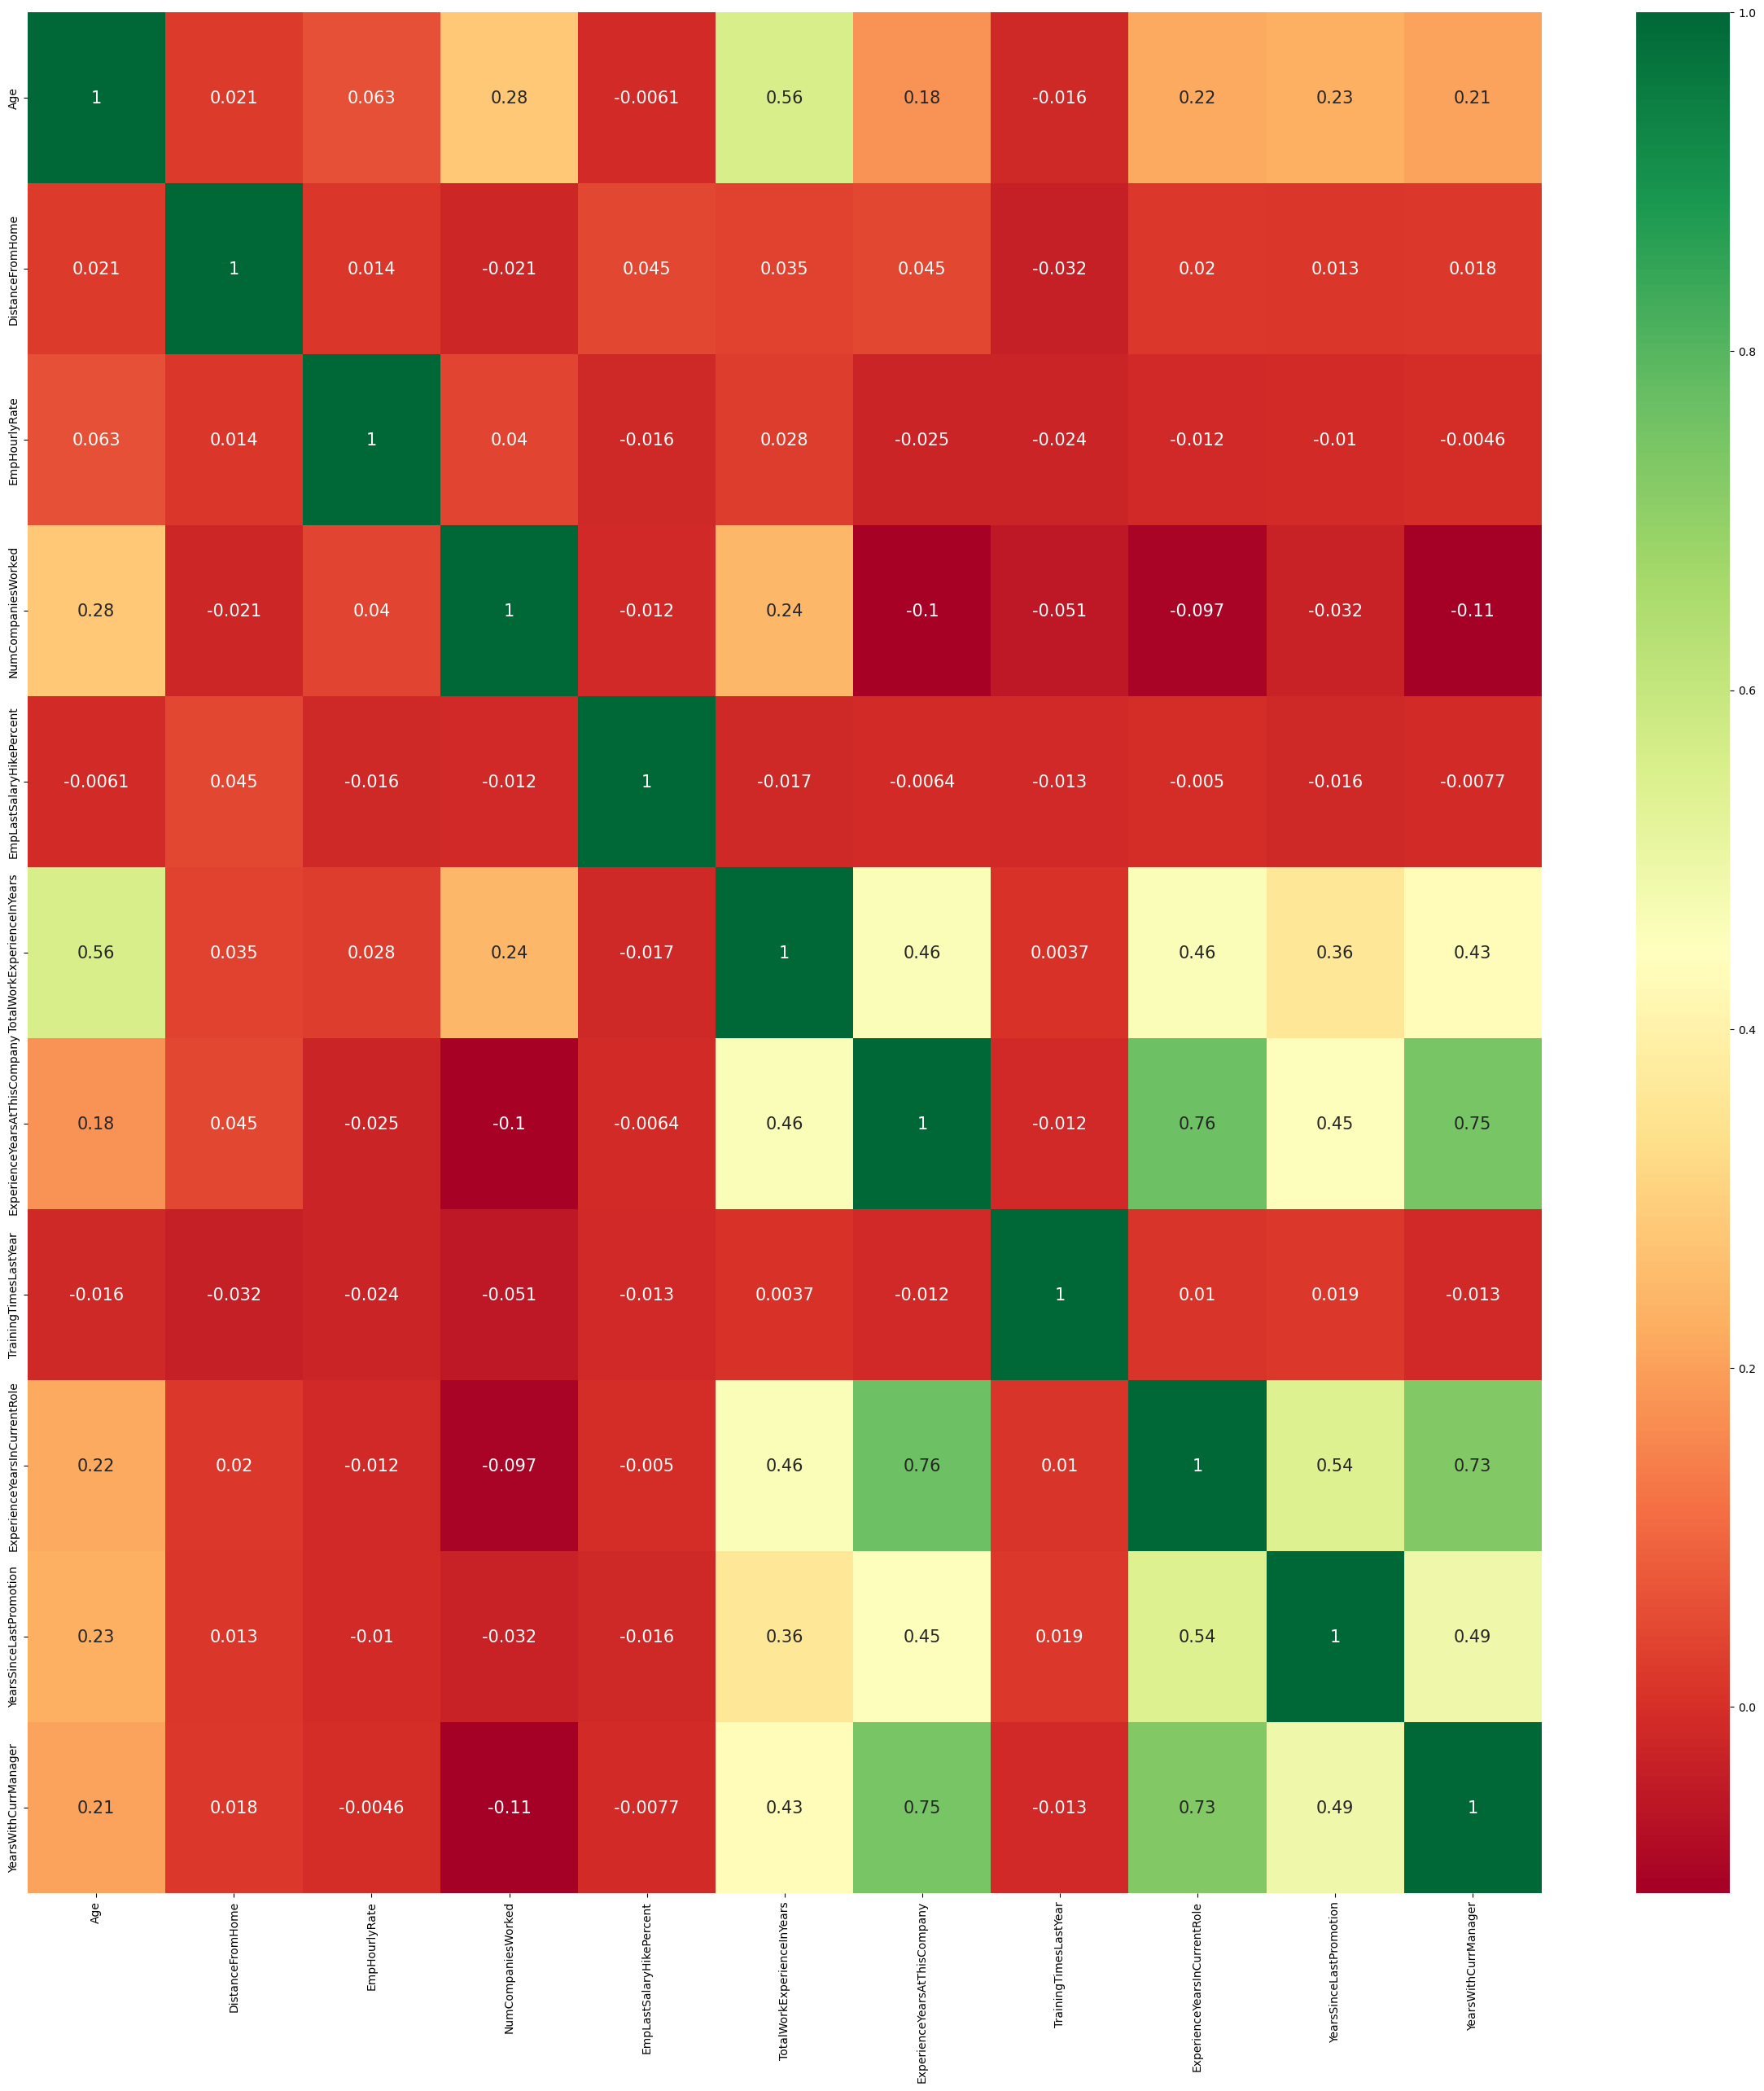

In [30]:
##NUMERIC COLUMNS
ds2=df[['Age','DistanceFromHome','EmpHourlyRate','NumCompaniesWorked','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'ExperienceYearsAtThisCompany','TrainingTimesLastYear','ExperienceYearsInCurrentRole','YearsSinceLastPromotion',
      'YearsWithCurrManager']]

plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(ds2.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation']]

* Numeric are columns are not highly correlated with each other

**CHI-SQUARE(CATEGORICAL ATTRIBUTES)**

In [31]:
asd=df[['Gender', 'EducationBackground', 'MaritalStatus','EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement',
        'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency','EmpJobLevel','EmpJobSatisfaction','OverTime',
       'EmpRelationshipSatisfaction','EmpWorkLifeBalance','Attrition']]
from sklearn.feature_selection import chi2
s=asd#categorical features
y=df["PerformanceRating"]#target feature

In [32]:
chis=chi2(s,y)#applying
chis

(array([6.45010450e-02, 1.51940780e-01, 1.23201098e+00, 3.14038417e-01,
        1.10691319e+02, 2.22075746e-01, 4.67870100e+01, 3.58961669e+01,
        9.98397489e-02, 6.27026259e+00, 1.08309855e-01, 7.96352956e+00,
        3.58014315e-01, 3.87650557e+00, 2.18630453e+00]),
 array([9.68263980e-01, 9.26843650e-01, 5.40097559e-01, 8.54687641e-01,
        9.19783224e-25, 8.94904855e-01, 6.92356641e-11, 1.60415528e-08,
        9.51305645e-01, 4.34940429e-02, 9.47285335e-01, 1.86526924e-02,
        8.36099915e-01, 1.43955251e-01, 3.35158320e-01]))

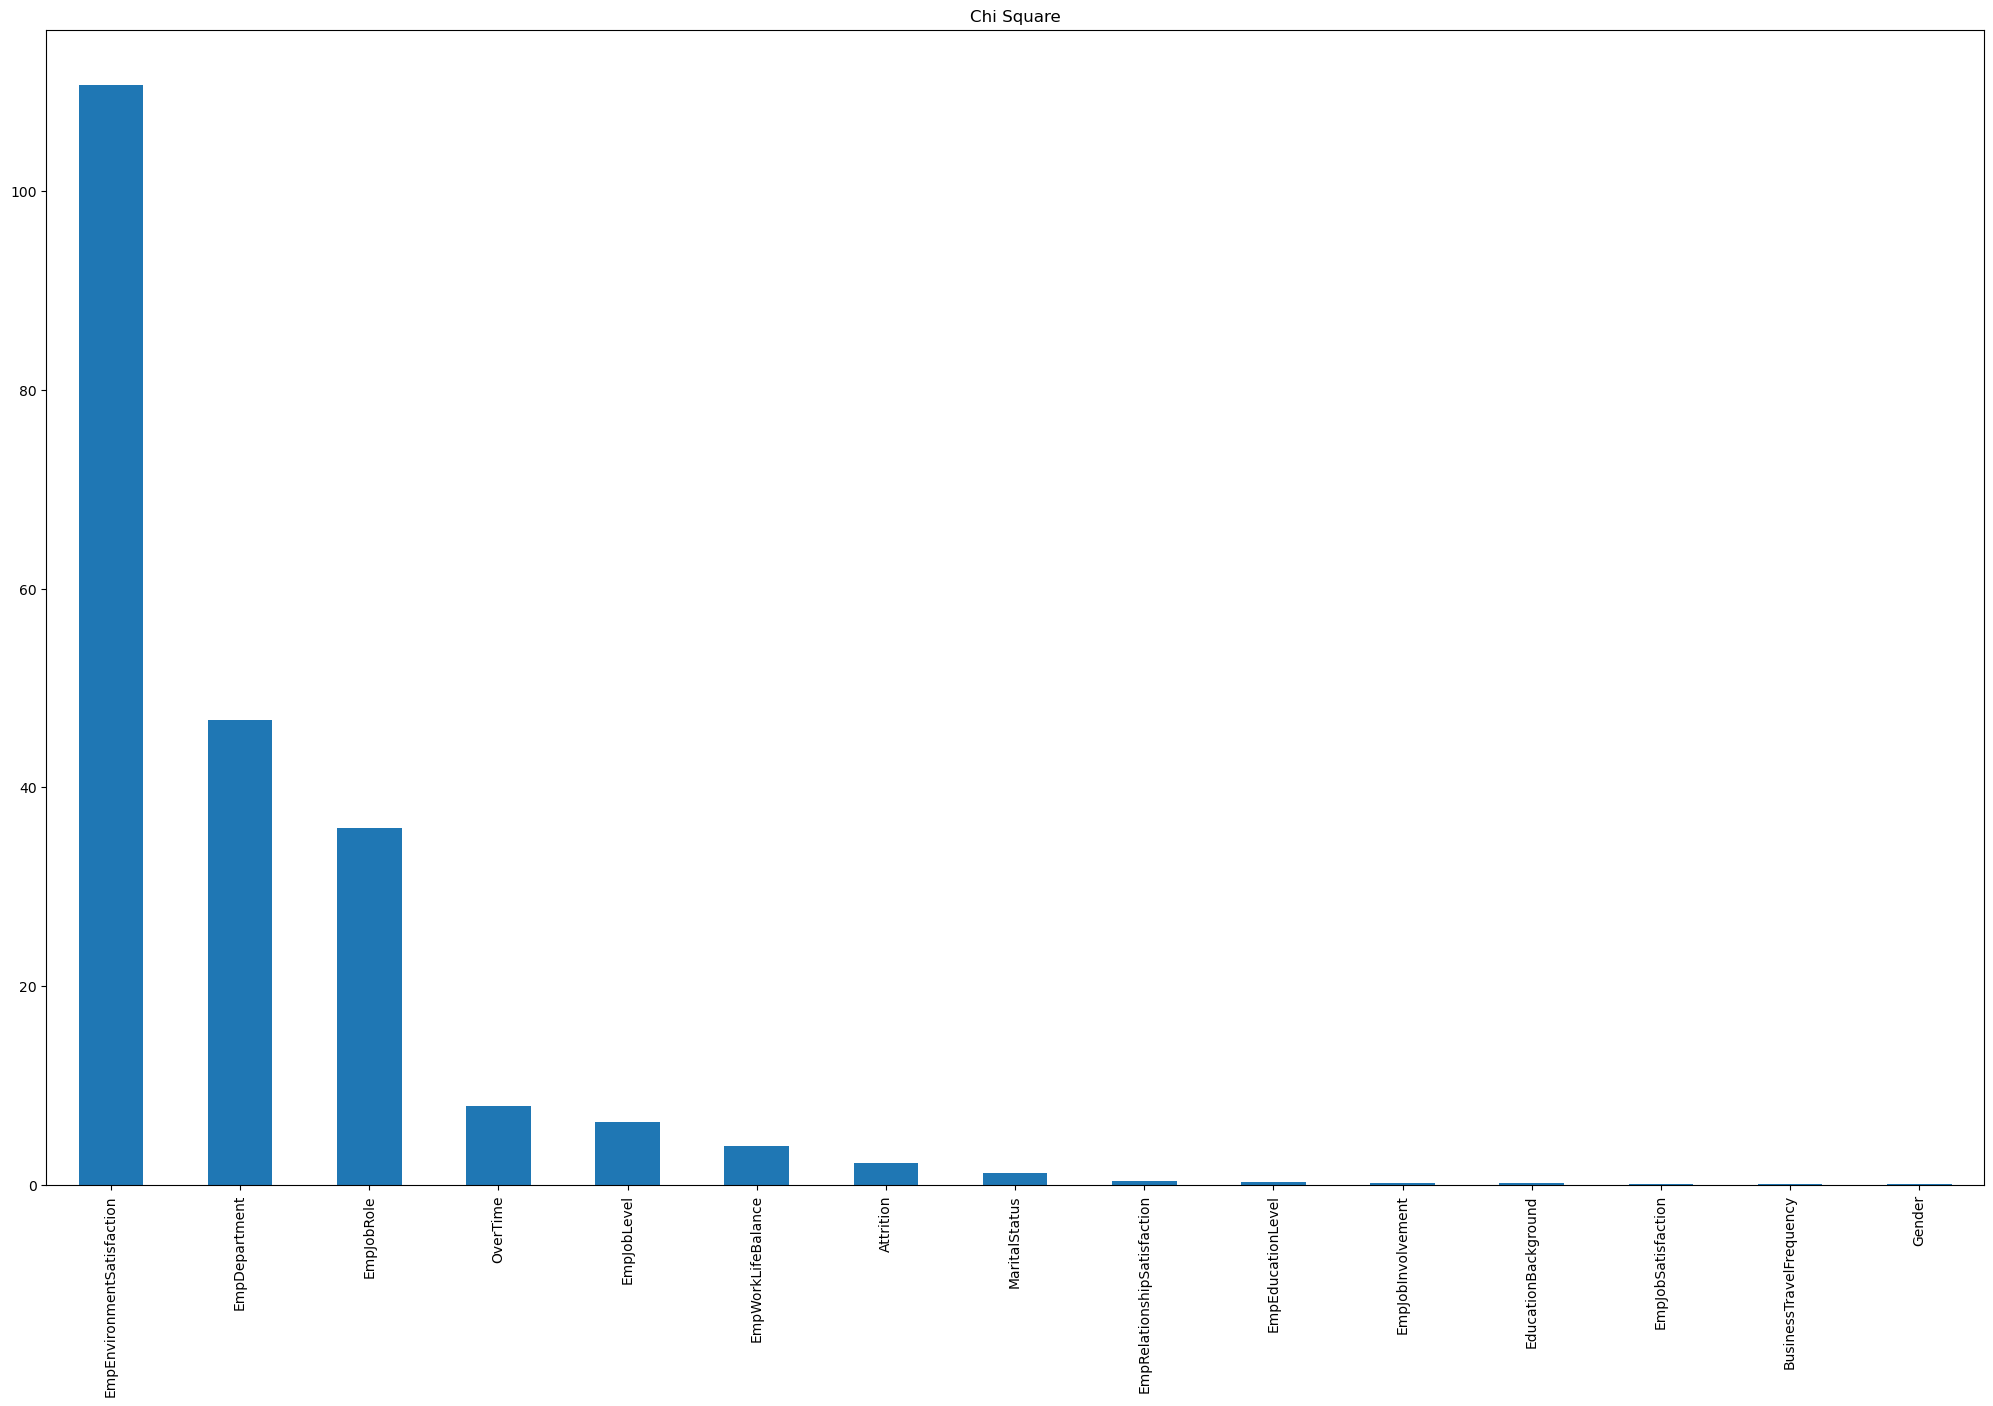

In [33]:
#Higher the chi value,higher the importance
plt.figure(figsize=(25,15))
chiv=pd.Series(chis[0],index=asd.columns)
chiv.sort_values(ascending=False,inplace=True)
plt.title("Chi Square")
chiv.plot.bar()
plt.show()

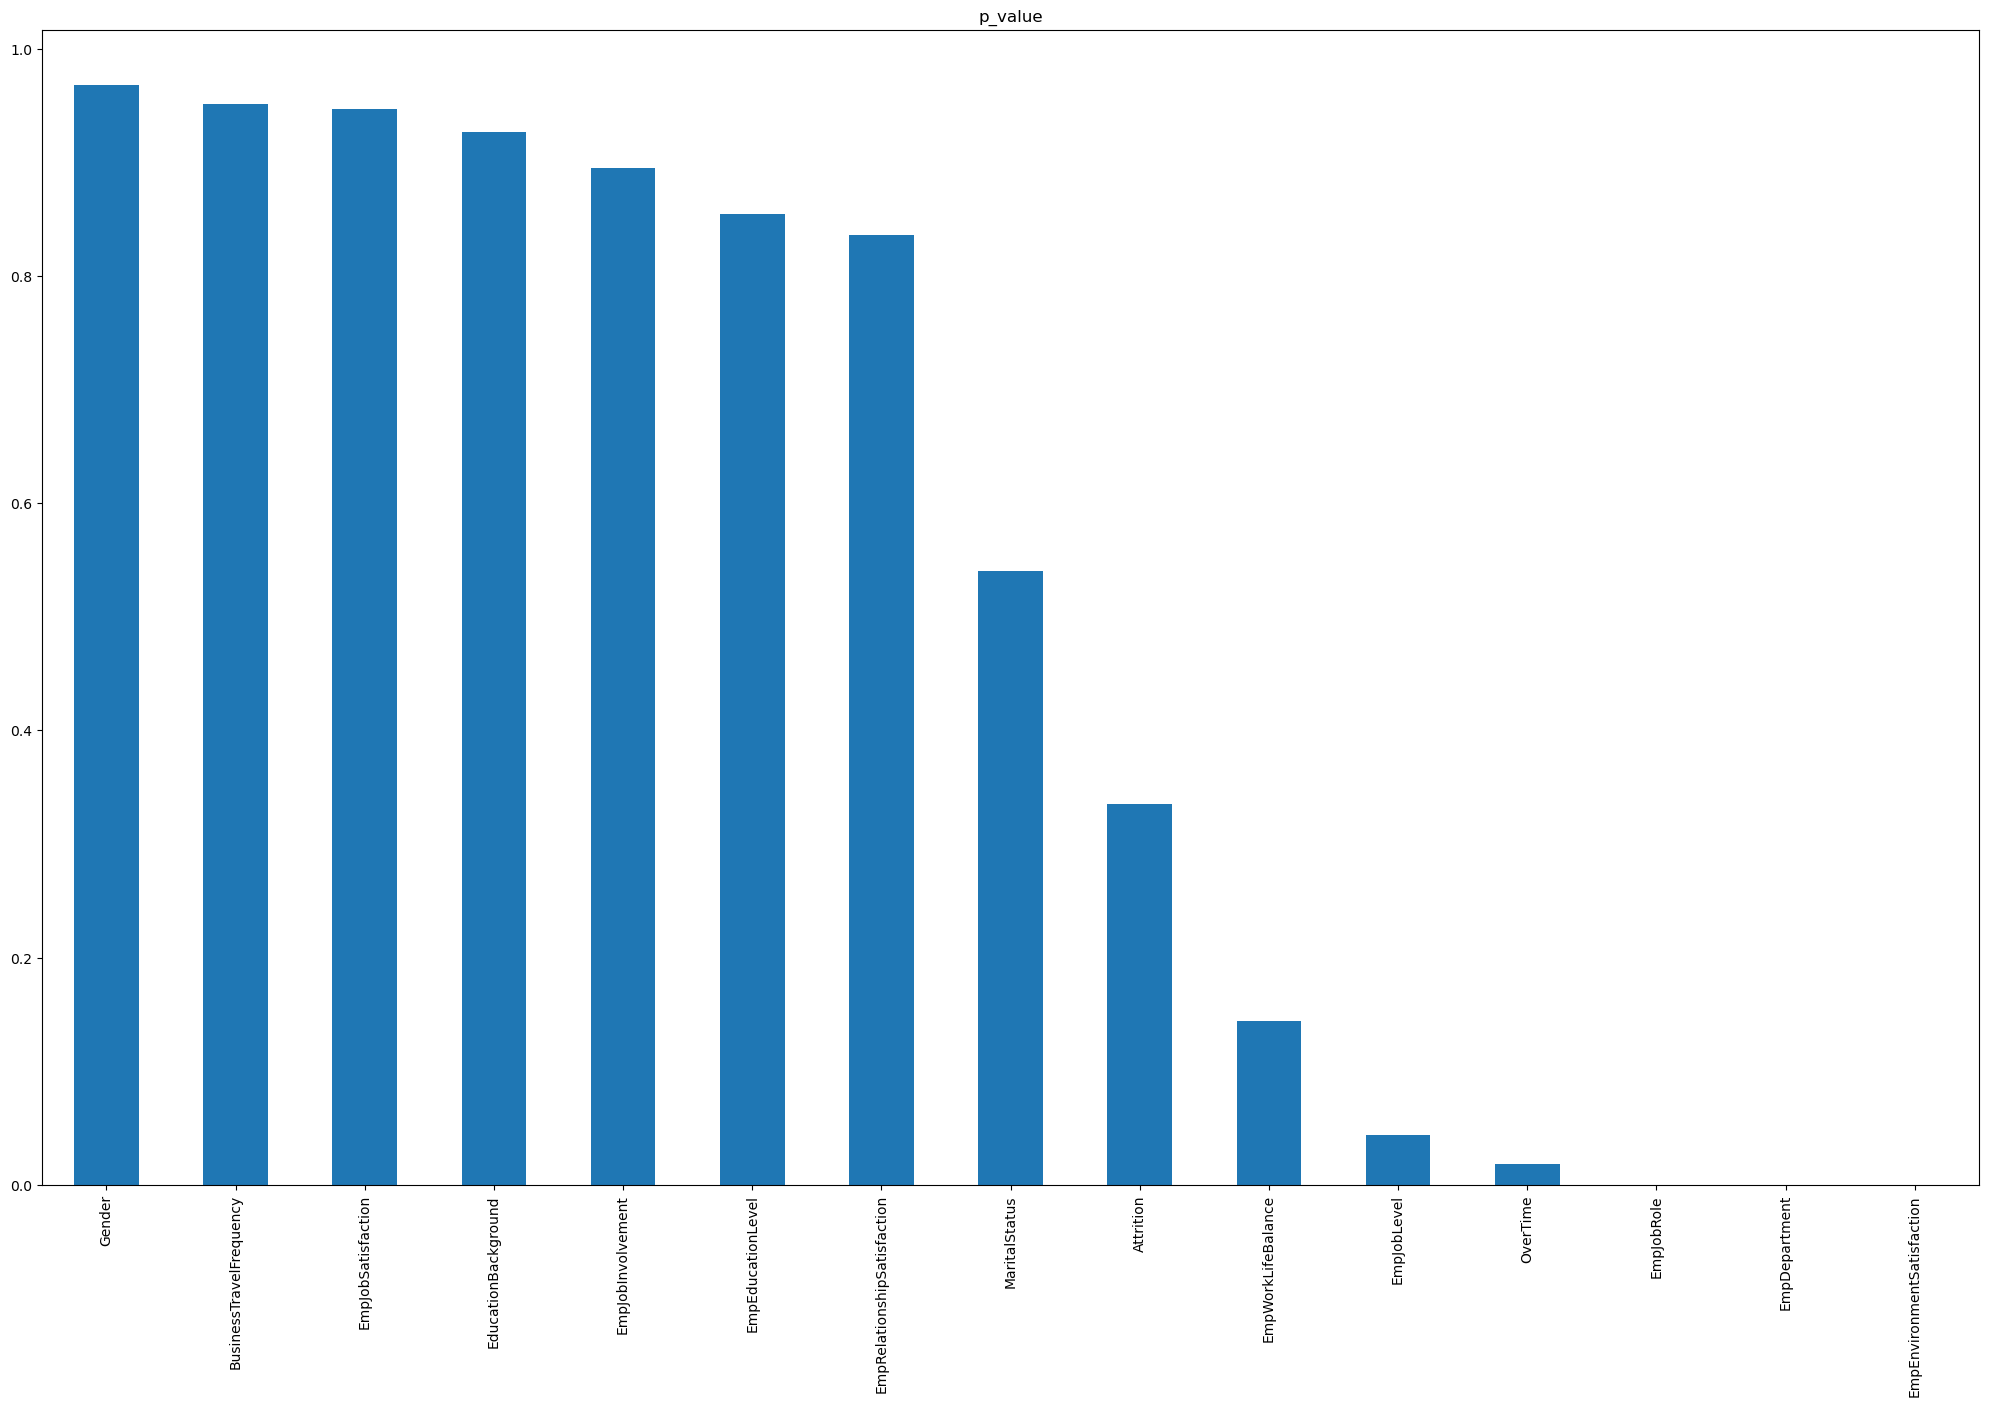

In [34]:
#Higher the p value,lower the importance
plt.figure(figsize=(25,15))
p_values=pd.Series(chis[1],index=asd.columns)
p_values.sort_values(ascending=False,inplace=True)
plt.title("p_value")
p_values.plot.bar()
plt.show()

In [35]:
# Lets remove the columns with low chi square score

In [ ]:
df.drop(["EmpNumber","Gender","BusinessTravelFrequency","EducationBackground","EmpEducationLevel","EmpJobInvolvement",
         "EmpRelationshipSatisfaction","MaritalStatus","Attrition"],axis=1,inplace=True)
#except job satisfaction column rest of  of columns that have low chi square score is removing..
#job satisfaction is an important feature in this list 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           1200 non-null   int64
 1   EmpDepartment                 1200 non-null   int32
 2   EmpJobRole                    1200 non-null   int32
 3   DistanceFromHome              1200 non-null   int64
 4   EmpEnvironmentSatisfaction    1200 non-null   int64
 5   EmpHourlyRate                 1200 non-null   int64
 6   EmpJobLevel                   1200 non-null   int64
 7   EmpJobSatisfaction            1200 non-null   int64
 8   NumCompaniesWorked            1200 non-null   int64
 9   OverTime                      1200 non-null   int64
 10  EmpLastSalaryHikePercent      1200 non-null   int64
 11  TotalWorkExperienceInYears    1200 non-null   int64
 12  TrainingTimesLastYear         1200 non-null   int64
 13  EmpWorkLifeBalance            120

In [38]:
 # already checked for contant columns #std=0